# 3. Modeling 
conduct a hyperparameter search to find the best combination of hyperparameters for Convolutional Neural Network (CNN).

## 3.1 Import Utility

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

from scripts.repository.repository import Repository
from scripts.modeling.trainer import Trainer
from scripts.modeling.history import get_history
from scripts.evaluation.evaluater import Evaluator
from scripts.modeling.cnn_builder import CNN
from scripts.utils.utility import show_image
from scripts.modeling.tuner import Tuner


%load_ext autoreload
%autoreload 2

## 3.2 Load Dataset

In [2]:
repo = Repository()

In [3]:
X = repo.load_data(
    name='X_contrast_stretching', folder='reference/Contrast_stretching', load_format='npy')


In [4]:
y = repo.load_data(name='y', folder='numpy', load_format='npy')


In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


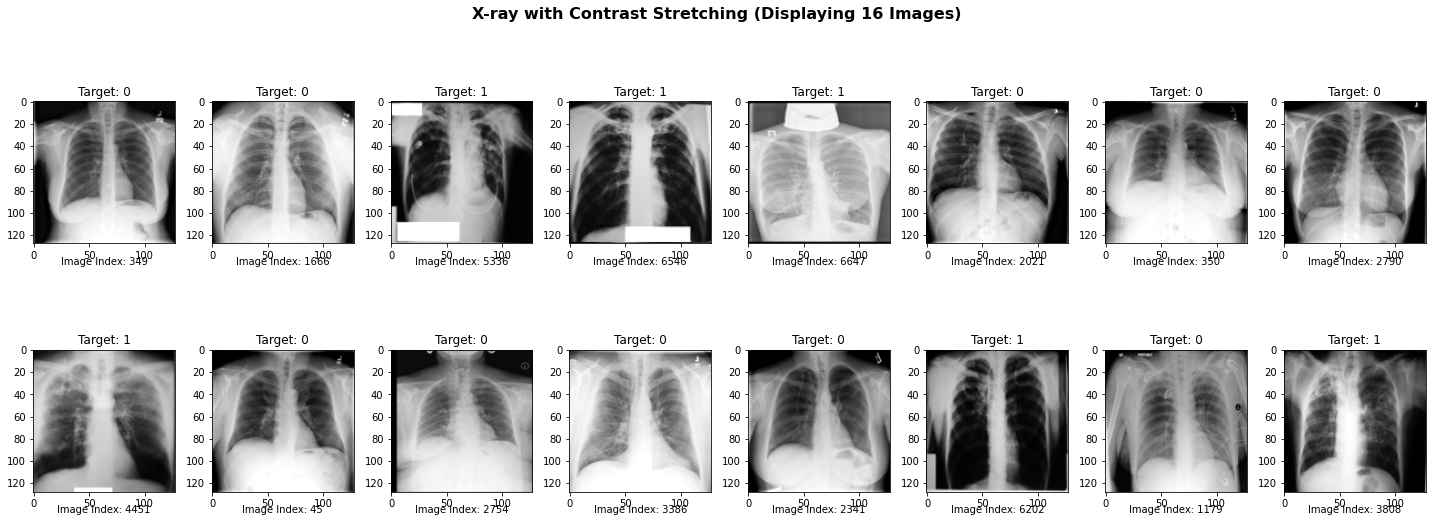

In [6]:
show_image(images=X, target=y,
           title="X-ray with Contrast Stretching", num_display=16, num_cols=8, random_mode=True)

## 3.3 Hyperparameter Tuning

In [6]:
param_grid = {
    'pooling_type': ['avg','max'],
    'conv_padding': ['same'],
    'conv_kernel_size': [(3, 3)],
    'conv_stride': [1,2],
    'pool_padding': ['same'],
    'pool_kernel_size': [(2, 2)],
    'pool_stride':[1,2],
    'learning_rate': [0.0001, 0.001, 0.01]
}

In [7]:
cnn_tuner = Tuner(
    estimator=CNN,
    param_grid=param_grid,
    input_shape=(128, 128),
    num_folds=5,
    epochs=3,
    batch_size=64,
)
cnn_tuner.fit(X=X, y=y)

Tuning...:   0%|          | 0/24 [00:00<?, ?it/s]

,Value
pooling_type,avg
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,1
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,1
learning_rate,0.0001


Tuning...:   4%|▍         | 1/24 [01:26<33:05, 86.32s/it]


Estimated Finish time in 3.01 hours / ~180.47 minutes
Estimated Finish Time: 2023-09-26 13:52:13


,Value
pooling_type,avg
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,1
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,1
learning_rate,0.001


K-fold (5/5):   0%|          | 0/5 [00:00<?, ?it/s]

Estimated Finish time in 2.90 hours / ~173.93 minutes
Estimated Finish Time: 2023-09-26 13:45:42


,Value
pooling_type,avg
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,1
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,1
learning_rate,0.01


Estimated Finish time in 2.90 hours / ~174.03 minutes
Estimated Finish Time: 2023-09-26 13:45:47


,Value
pooling_type,avg
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,1
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,2
learning_rate,0.0001


K-fold (5/5):   0%|          | 0/5 [00:00<?, ?it/s]

Estimated Finish time in 2.39 hours / ~143.65 minutes
Estimated Finish Time: 2023-09-26 13:15:24


,Value
pooling_type,avg
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,1
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,2
learning_rate,0.001


Estimated Finish time in 2.09 hours / ~125.20 minutes
Estimated Finish Time: 2023-09-26 12:56:57


,Value
pooling_type,avg
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,1
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,2
learning_rate,0.01


K-fold (5/5):   0%|          | 0/5 [00:00<?, ?it/s]

Estimated Finish time in 1.88 hours / ~113.10 minutes
Estimated Finish Time: 2023-09-26 12:44:51


,Value
pooling_type,avg
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,2
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,1
learning_rate,0.0001


Estimated Finish time in 1.67 hours / ~99.93 minutes
Estimated Finish Time: 2023-09-26 12:31:42


,Value
pooling_type,avg
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,2
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,1
learning_rate,0.001


K-fold (5/5):   0%|          | 0/5 [00:00<?, ?it/s]

Estimated Finish time in 1.50 hours / ~90.16 minutes
Estimated Finish Time: 2023-09-26 12:21:55


,Value
pooling_type,avg
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,2
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,1
learning_rate,0.01


Estimated Finish time in 1.38 hours / ~82.50 minutes
Estimated Finish Time: 2023-09-26 12:14:16


,Value
pooling_type,avg
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,2
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,2
learning_rate,0.0001


K-fold (5/5):   0%|          | 0/5 [00:00<?, ?it/s]

Estimated Finish time in 1.26 hours / ~75.81 minutes
Estimated Finish Time: 2023-09-26 12:07:34


,Value
pooling_type,avg
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,2
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,2
learning_rate,0.001


Estimated Finish time in 1.17 hours / ~70.29 minutes
Estimated Finish Time: 2023-09-26 12:02:03


,Value
pooling_type,avg
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,2
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,2
learning_rate,0.01


K-fold (5/5):   0%|          | 0/5 [00:00<?, ?it/s]

Estimated Finish time in 1.09 hours / ~65.67 minutes
Estimated Finish Time: 2023-09-26 11:57:26


,Value
pooling_type,max
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,1
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,1
learning_rate,0.0001


Estimated Finish time in 1.26 hours / ~75.73 minutes
Estimated Finish Time: 2023-09-26 12:07:30


,Value
pooling_type,max
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,1
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,1
learning_rate,0.001


K-fold (5/5):   0%|          | 0/5 [00:00<?, ?it/s]

Estimated Finish time in 1.41 hours / ~84.35 minutes
Estimated Finish Time: 2023-09-26 12:16:06


,Value
pooling_type,max
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,1
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,1
learning_rate,0.01


Estimated Finish time in 1.54 hours / ~92.22 minutes
Estimated Finish Time: 2023-09-26 12:23:59


,Value
pooling_type,max
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,1
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,2
learning_rate,0.0001


K-fold (5/5):   0%|          | 0/5 [00:00<?, ?it/s]

Estimated Finish time in 1.50 hours / ~89.94 minutes
Estimated Finish Time: 2023-09-26 12:21:42


,Value
pooling_type,max
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,1
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,2
learning_rate,0.001


Estimated Finish time in 1.47 hours / ~87.99 minutes
Estimated Finish Time: 2023-09-26 12:19:45


,Value
pooling_type,max
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,1
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,2
learning_rate,0.01


K-fold (5/5):   0%|          | 0/5 [00:00<?, ?it/s]

Estimated Finish time in 1.44 hours / ~86.24 minutes
Estimated Finish Time: 2023-09-26 12:18:00


,Value
pooling_type,max
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,2
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,1
learning_rate,0.0001


Estimated Finish time in 1.38 hours / ~83.04 minutes
Estimated Finish Time: 2023-09-26 12:14:48


,Value
pooling_type,max
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,2
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,1
learning_rate,0.001


K-fold (5/5):   0%|          | 0/5 [00:00<?, ?it/s]

Estimated Finish time in 1.34 hours / ~80.18 minutes
Estimated Finish Time: 2023-09-26 12:11:57


,Value
pooling_type,max
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,2
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,1
learning_rate,0.01


Estimated Finish time in 1.29 hours / ~77.63 minutes
Estimated Finish Time: 2023-09-26 12:09:23


,Value
pooling_type,max
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,2
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,2
learning_rate,0.0001


K-fold (5/5):   0%|          | 0/5 [00:00<?, ?it/s]

Estimated Finish time in 1.25 hours / ~74.89 minutes
Estimated Finish Time: 2023-09-26 12:06:39


,Value
pooling_type,max
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,2
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,2
learning_rate,0.001


Estimated Finish time in 1.21 hours / ~72.45 minutes
Estimated Finish Time: 2023-09-26 12:04:12


,Value
pooling_type,max
conv_padding,same
conv_kernel_size,"(3, 3)"
conv_stride,2
pool_padding,same
pool_kernel_size,"(2, 2)"
pool_stride,2
learning_rate,0.01


Estimated Finish time in 1.17 hours / ~70.16 minutes
Estimated Finish Time: 2023-09-26 12:01:55
Finish Tunning!! at 2023-09-26 12:01:55


In [8]:
cnn_tuner.best_hyperparameters

{'pooling_type': 'max',
 'conv_padding': 'same',
 'conv_kernel_size': (3, 3),
 'conv_stride': 1,
 'pool_padding': 'same',
 'pool_kernel_size': (2, 2),
 'pool_stride': 2,
 'learning_rate': 0.01}

In [9]:
cnn_tuner.best_accuracy

0.9408095240592956

In [11]:
perf_df=cnn_tuner.get_pandas()
perf_df

,Model,Optimizer parameters Configuration,Hyperparameters Configuration,Model Architecture Configuration,Model Training Configuration,accuracy_train,accuracy_val,loss_train,loss_val,Training time,Training in seconds,Accuracy_train,Accuracy_val
0,1,"{'optimizer_name': 'adam', 'learning_rate': 1e...","{'conv_padding': 'same', 'conv_kernel_size': (...","{'input_shape': (128, 128), 'unit_size_rate': ...","{'batch_size': 64, 'epoch': 3}","[0.6678928554058075, 0.7942857146263123, 0.840...","[0.7325714290142059, 0.8350000143051147, 0.854...","[0.6050880134105683, 0.4585361540317535, 0.379...","[0.5198731184005737, 0.4064439177513123, 0.344...",1 minutes 29 seconds,89.594674,0.767488,0.807333
1,2,"{'optimizer_name': 'adam', 'learning_rate': 0....","{'conv_padding': 'same', 'conv_kernel_size': (...","{'input_shape': (128, 128), 'unit_size_rate': ...","{'batch_size': 64, 'epoch': 3}","[0.6081071376800538, 0.7238214254379273, 0.748...","[0.6974285781383515, 0.7295714318752289, 0.746...","[0.6362621188163757, 0.45647465288639066, 0.41...","[0.4956715047359467, 0.43169003129005434, 0.40...",1 minutes 23 seconds,83.113655,0.693310,0.724571
2,3,"{'optimizer_name': 'adam', 'learning_rate': 0....","{'conv_padding': 'same', 'conv_kernel_size': (...","{'input_shape': (128, 128), 'unit_size_rate': ...","{'batch_size': 64, 'epoch': 3}","[0.7437857031822205, 0.8256071448326111, 0.855...","[0.8195714354515076, 0.8222857236862182, 0.851...","[0.5080082654953003, 0.32640261948108673, 0.26...","[0.3321477025747299, 0.31612333506345747, 0.26...",1 minutes 26 seconds,86.434864,0.808214,0.831000
3,4,"{'optimizer_name': 'adam', 'learning_rate': 1e...","{'conv_padding': 'same', 'conv_kernel_size': (...","{'input_shape': (128, 128), 'unit_size_rate': ...","{'batch_size': 64, 'epoch': 3}","[0.5254999935626984, 0.6465356945991516, 0.716...","[0.612714284658432, 0.6984285831451416, 0.7465...","[0.6875815987586975, 0.6639415502548218, 0.614...","[0.6801347255706787, 0.6438679099082947, 0.582...",0 minutes 25 seconds,25.686413,0.629369,0.685905
4,5,"{'optimizer_name': 'adam', 'learning_rate': 0....","{'conv_padding': 'same', 'conv_kernel_size': (...","{'input_shape': (128, 128), 'unit_size_rate': ...","{'batch_size': 64, 'epoch': 3}","[0.5860357105731964, 0.7083214163780213, 0.737...","[0.6814285635948181, 0.7120000004768372, 0.730...","[0.6298387110233307, 0.5181342244148255, 0.465...","[0.5638982713222503, 0.49879132509231566, 0.45...",0 minutes 25 seconds,25.208457,0.677440,0.707905
5,6,"{'optimizer_name': 'adam', 'learning_rate': 0....","{'conv_padding': 'same', 'conv_kernel_size': (...","{'input_shape': (128, 128), 'unit_size_rate': ...","{'batch_size': 64, 'epoch': 3}","[0.616785717010498, 0.6590714275836944, 0.6710...","[0.6519999980926514, 0.666142863035202, 0.6688...","[0.588500303030014, 0.5105405271053314, 0.4911...","[0.5304926097393036, 0.48579083383083344, 0.48...",0 minutes 25 seconds,25.800984,0.648964,0.662333
6,7,"{'optimizer_name': 'adam', 'learning_rate': 1e...","{'conv_padding': 'same', 'conv_kernel_size': (...","{'input_shape': (128, 128), 'unit_size_rate': ...","{'batch_size': 64, 'epoch': 3}","[0.5545000076293946, 0.5835357129573822, 0.598...","[0.5792857110500336, 0.5744285762310029, 0.609...","[0.6906976580619812, 0.680362594127655, 0.6566...","[0.6874266624450683, 0.6687333226203919, 0.640...",0 minutes 9 seconds,9.960394,0.578679,0.587667
7,8,"{'optimizer_name': 'adam', 'learning_rate': 0....","{'conv_padding': 'same', 'conv_kernel_size': (...","{'input_shape': (128, 128), 'unit_size_rate': ...","{'batch_size': 64, 'epoch': 3}","[0.6744285821914673, 0.8620000004768371, 0.898...","[0.8278571605682373, 0.8811428666114807, 0.907...","[0.5834372639656067, 0.3751686692237854, 0.290...","[0.4721429944038391, 0.31775813102722167, 0.26...",0 minutes 10 seconds,10.349388,0.811476,0.872286
8,9,"{'optimizer_name': 'adam', 'learning_rate': 0....","{'conv_padding': 'same', 'conv_kernel_size': (...","{'input_shape': (128, 128), 'unit_size_rate': ...

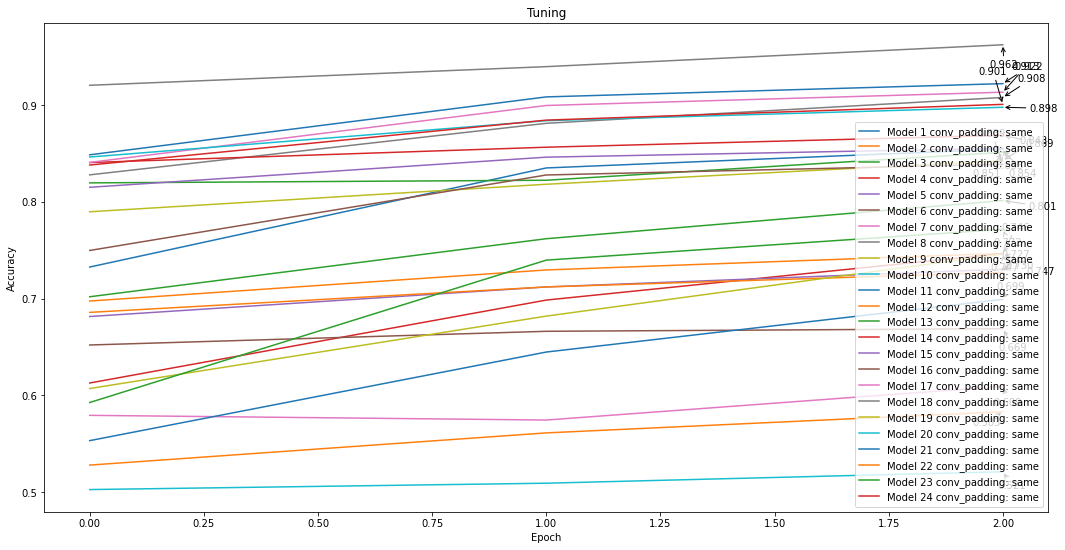

In [12]:
cnn_tuner.plot_accuracy_comparison(title='Tuning', configuration_key='Hyperparameters Configuration', hyperparameter_name='conv_padding', performance='val')

In [15]:
cnn_tuner.best_estimator_.summary()

Model: "sequential_179"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_537 (Conv2D)         (None, 128, 128, 1)       10        
                                                                 
 max_pooling2d_177 (MaxPooli  (None, 64, 64, 1)        0         
 ng2D)                                                           
                                                                 
 conv2d_538 (Conv2D)         (None, 64, 64, 3)         30        
                                                                 
 max_pooling2d_178 (MaxPooli  (None, 32, 32, 3)        0         
 ng2D)                                                           
                                                                 
 conv2d_539 (Conv2D)         (None, 32, 32, 6)         168       
                                                                 
 max_pooling2d_179 (MaxPooli  (None, 16, 16, 6)     

## 3.4 Best Artifact

### Train

In [7]:
model_config = {
    'input_shape': (128, 128),
    'unit_size_rate': 0.5,
    'l1_lambda': None,
    'l2_lambda': None,

    'conv_padding': 'same',
    'conv_kernel_size': (3, 3),
    'conv_stride': 1,

    'pool_padding': 'same',
    'pool_kernel_size': (2, 2),
    'pool_stride': 2,


    'dropout': 0,
    'pooling_type': 'max'
}

# Build model
model = CNN(**model_config).build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)      

In [9]:
train_config = {
    'estimator': model,
    'estimator_name' : 'CNN_best_artifact',
    'ref_name': 'Original dataset',
    'input_shape': (128, 128),
    'epochs': 12,
    'batch_size': 64,
    'estimator_config': model_config,
}
trainer = Trainer(**train_config)

In [10]:
trainer.choose_optimizer(opt_name='adam', learning_rate=0.001)

In [11]:
trainer.fit(X_train=X_train,y_train=y_train, X_val=X_val,y_val=y_val)

,Optimizer parameters Configuration,Hyperparameters Configuration,Model Architecture Configuration,Model Training Configuration
0,"{'optimizer_name': 'adam', 'learning_rate': 0.001, 'beta1': 0.9, 'beta2': 0.999, 'epsilon': 1e-08, 'momentum': None, 'rho': None}","{'conv_padding': 'same', 'conv_kernel_size': (3, 3), 'conv_stride': 1, 'pool_padding': 'same', 'pool_kernel_size': (2, 2), 'pool_stride': 2, 'pooling_type': 'max'}","{'input_shape': (128, 128), 'unit_size_rate': 0.5}","{'batch_size': 64, 'epoch': 12}"


Epoch 1/12
88/88 [==============================] - 27s 302ms/step - loss: 0.4098 - accuracy: 0.8229 - val_loss: 0.1918 - val_accuracy: 0.9314
Epoch 2/12
88/88 [==============================] - 29s 331ms/step - loss: 0.1591 - accuracy: 0.9393 - val_loss: 0.1046 - val_accuracy: 0.9714
Epoch 3/12
88/88 [==============================] - 27s 306ms/step - loss: 0.0935 - accuracy: 0.9666 - val_loss: 0.0778 - val_accuracy: 0.9729
Epoch 4/12
88/88 [==============================] - 27s 303ms/step - loss: 0.0673 - accuracy: 0.9762 - val_loss: 0.0783 - val_accuracy: 0.9743
Epoch 5/12
88/88 [==============================] - 27s 301ms/step - loss: 0.0506 - accuracy: 0.9814 - val_loss: 0.0430 - val_accuracy: 0.9871
Epoch 6/12
88/88 [==============================] - 27s 305ms/step - loss: 0.0390 - accuracy: 0.9855 - val_loss: 0.0373 - val_accuracy: 0.9871
Epoch 7/12
88/88 [==============================] - 27s 303ms/step - loss: 0.0398 - accuracy: 0.9866 - val_loss: 0.0458 - val_accuracy: 0.9857

### Evaluate

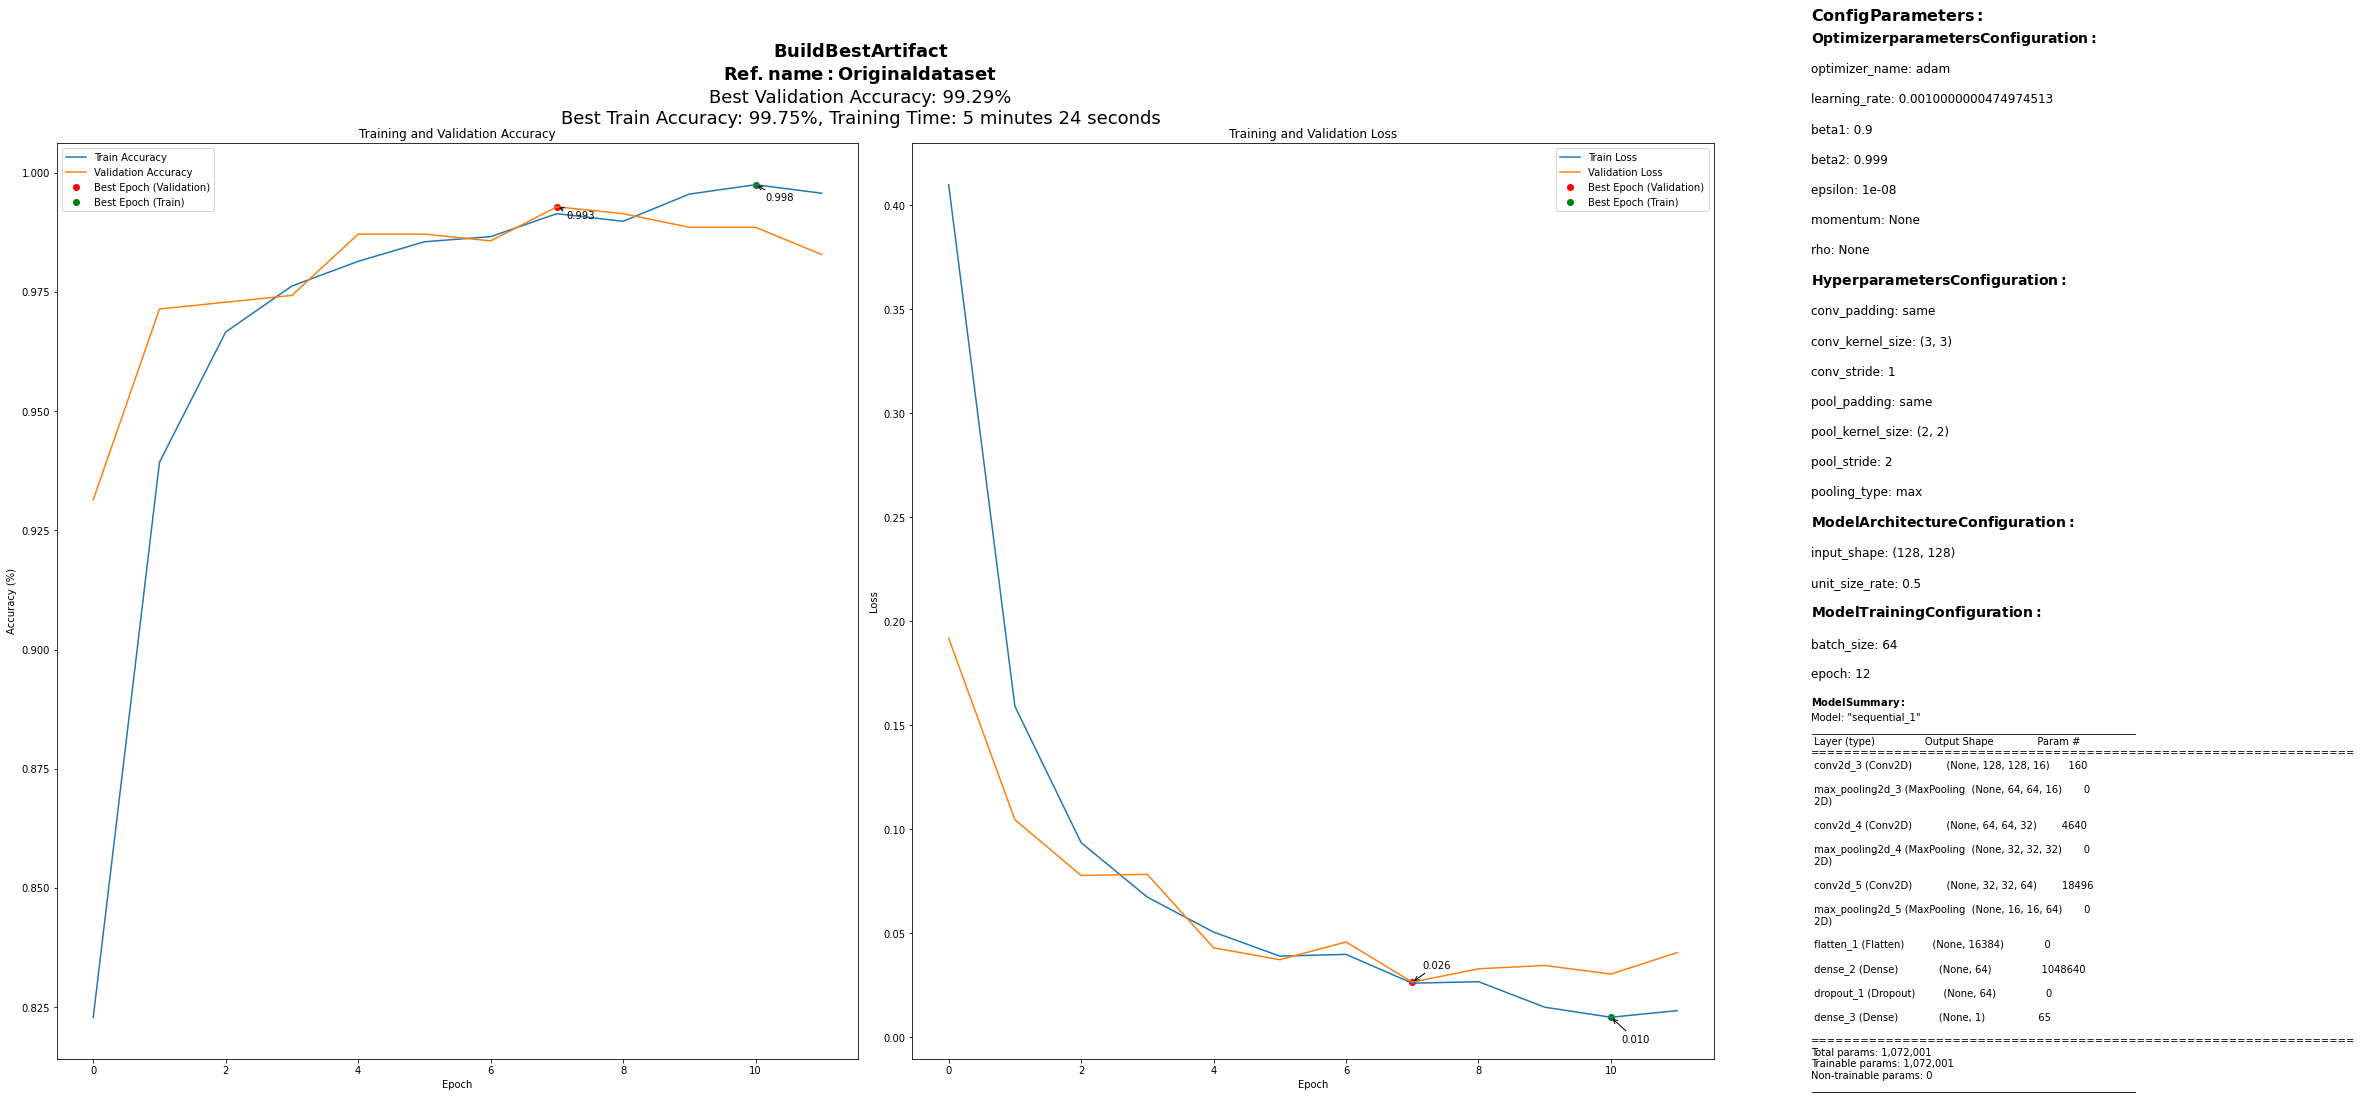

In [12]:
title = 'Build Best Artifact'

trainer.get_history(title=title)


In [13]:
tag = {
    'estimator_name':'CNN_best_artifact',
    'ref_name':'Original dataset',
    'config_param': trainer.get_config(),
    'history':trainer.history,
    'training_time': trainer.training_time,
}
evaluator = Evaluator(**tag)
train_performance_df, y_pred_train = evaluator.evaluate(estimator=model,
                                          X=X_train, 
                                          y_actual=y_train, 
                                          subset_name='Train', 
                                          threshold=None)

val_performance_df, y_pred_val = evaluator.evaluate(estimator=model,
                                        X=X_val, 
                                        y_actual=y_val, 
                                        subset_name='Validation', 
                                        threshold=None)
test_performance_df, y_pred_test = evaluator.evaluate(estimator=model,
                                                    X=X_test,
                                                    y_actual=y_test,
                                                    subset_name='Test',
                                                    threshold=None)


22/22 [==============================] - 1s 36ms/step


In [14]:
train_performance_df


,Model,Timestamp,Reference name,Optimizer parameters Configuration,Hyperparameters Configuration,Model Architecture Configuration,Model Training Configuration,accuracy_train,accuracy_val,Subset,...,Training in seconds,TP,FP,FN,TN,Precision,Recall,F1,AUC,Accuracy
0,CNN_best_artifact,2023-09-26 13:51:23,Original dataset,"{'optimizer_name': 'adam', 'learning_rate': 0....","{'conv_padding': 'same', 'conv_kernel_size': (...","{'input_shape': (128, 128), 'unit_size_rate': ...","{'batch_size': 64, 'epoch': 12}","[0.822857141494751, 0.9392856955528259, 0.9666...","[0.9314285516738892, 0.9714285731315613, 0.972...",Train,...,324.51362,2800,0,20,2780,0.996454,0.996429,0.996429,0.996429,0.996429


In [15]:
val_performance_df


,Model,Timestamp,Reference name,Optimizer parameters Configuration,Hyperparameters Configuration,Model Architecture Configuration,Model Training Configuration,accuracy_train,accuracy_val,Subset,...,Training in seconds,TP,FP,FN,TN,Precision,Recall,F1,AUC,Accuracy
0,CNN_best_artifact,2023-09-26 13:51:24,Original dataset,"{'optimizer_name': 'adam', 'learning_rate': 0....","{'conv_padding': 'same', 'conv_kernel_size': (...","{'input_shape': (128, 128), 'unit_size_rate': ...","{'batch_size': 64, 'epoch': 12}","[0.822857141494751, 0.9392856955528259, 0.9666...","[0.9314285516738892, 0.9714285731315613, 0.972...",Validation,...,324.51362,348,2,10,340,0.98311,0.982857,0.982855,0.982857,0.982857


In [16]:
test_performance_df


,Model,Timestamp,Reference name,Optimizer parameters Configuration,Hyperparameters Configuration,Model Architecture Configuration,Model Training Configuration,accuracy_train,accuracy_val,Subset,...,Training in seconds,TP,FP,FN,TN,Precision,Recall,F1,AUC,Accuracy
0,CNN_best_artifact,2023-09-26 13:51:24,Original dataset,"{'optimizer_name': 'adam', 'learning_rate': 0....","{'conv_padding': 'same', 'conv_kernel_size': (...","{'input_shape': (128, 128), 'unit_size_rate': ...","{'batch_size': 64, 'epoch': 12}","[0.822857141494751, 0.9392856955528259, 0.9666...","[0.9314285516738892, 0.9714285731315613, 0.972...",Test,...,324.51362,346,4,7,343,0.984321,0.984286,0.984285,0.984286,0.984286


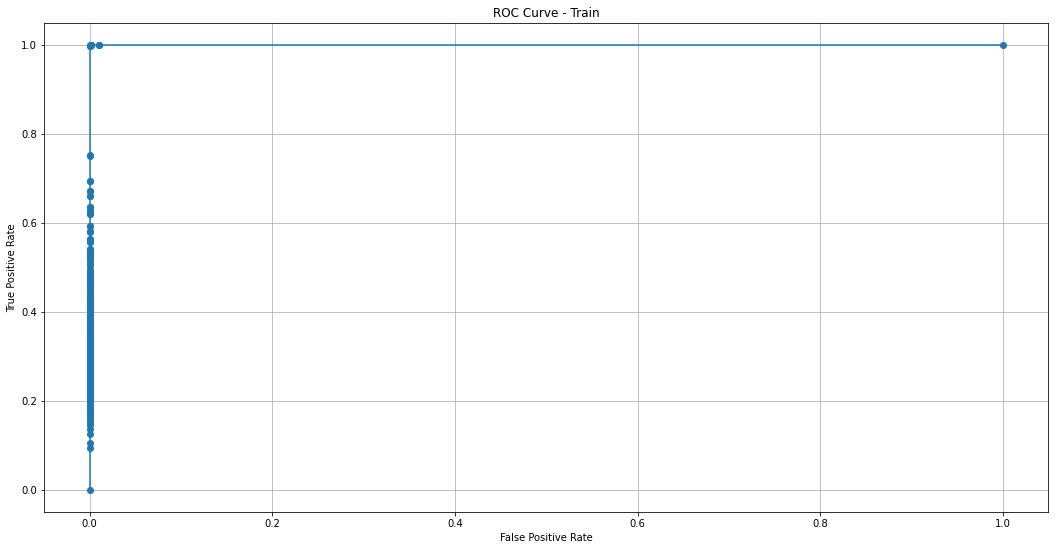

In [17]:
evaluator.plot_roc(y_actual=y_train, y_pred=y_pred_train, subset_name='Train')

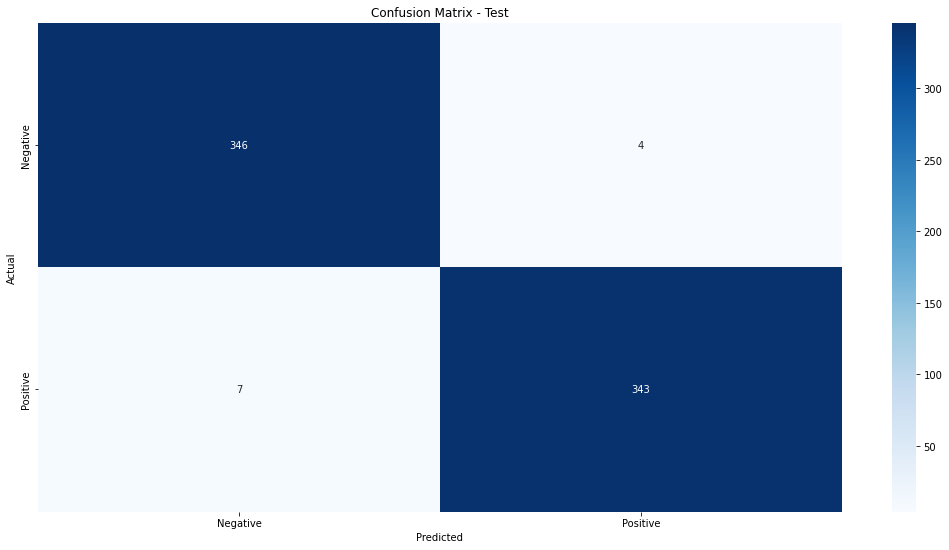

In [18]:
evaluator.plot_confusion_matrix(
    y_actual=y_test, y_pred=y_pred_test, subset_name='Test')


In [19]:
trainer.save_artifact(model_name='CNN_best_artifact')

Model: cnn_best_artifact
-> saved at 'd:\Repo\DS\Classification\BinaryClassification\Tuberculosis\artifacts\cnn_best_artifact.h5'
